First 5 rows of the dataset:
   TimestepsSoFar  InitialBound  TimeElapsed  LearnableVariance  MeanEntropy  \
0            2246     12.802255     0.766397                NaN     0.693108   
1            4570     14.572325     1.984927                NaN     0.693110   
2            6886     11.063177     3.202308                NaN     0.693101   
3            8981     11.135786     4.459119                NaN     0.693104   
4           11124     12.613329     5.632846                NaN     0.693101   

   J_sample_variance  EpLenMean      Bound  EpRewMean  EpThisIter  \
0          238.61458      22.46  12.802255      22.46         100   
1          220.38625      23.24  14.572325      23.24         100   
2          253.65091      23.16  11.063177      23.16         100   
3          236.22980      20.95  11.135786      20.95         100   
4          264.12637      21.43  12.613329      21.43         100   

   EpisodesSoFar  VarianceInit  ReturnMeanIW  Iteration  
0            100 

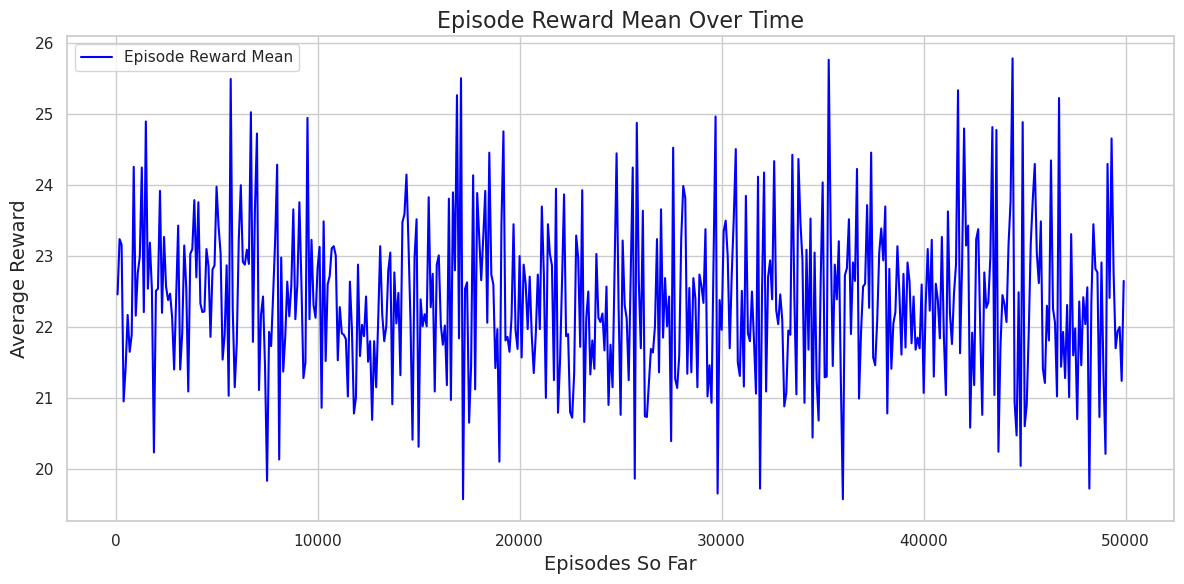

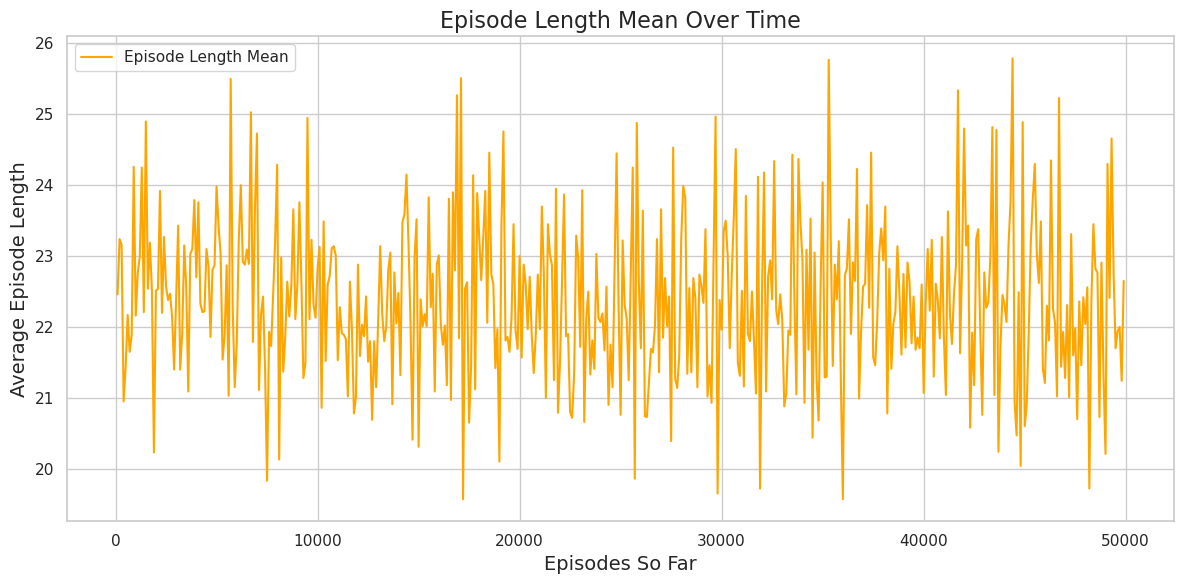

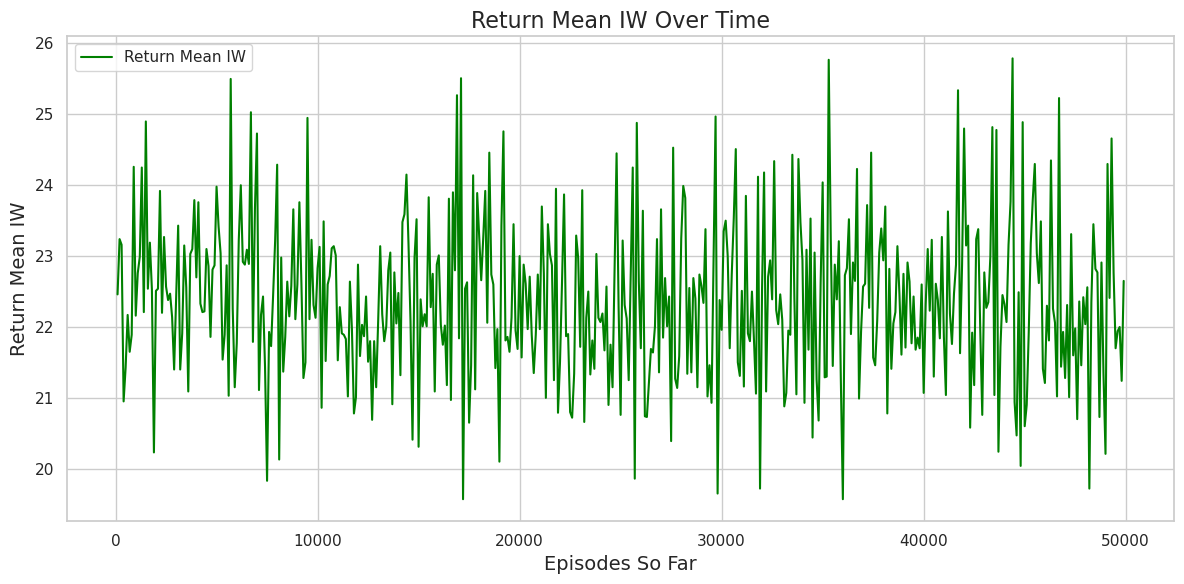

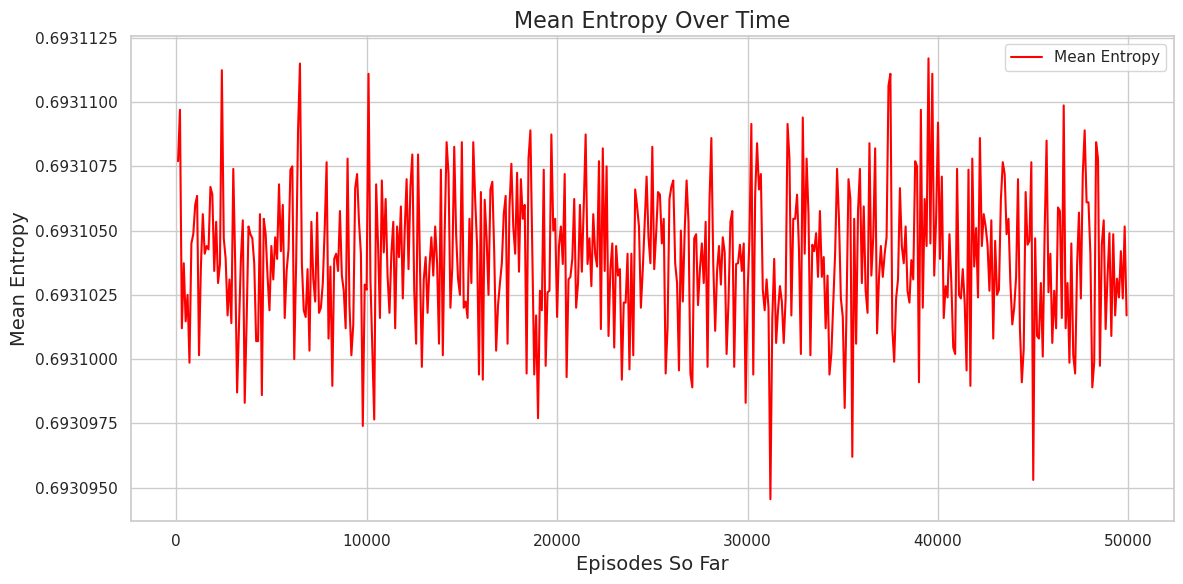

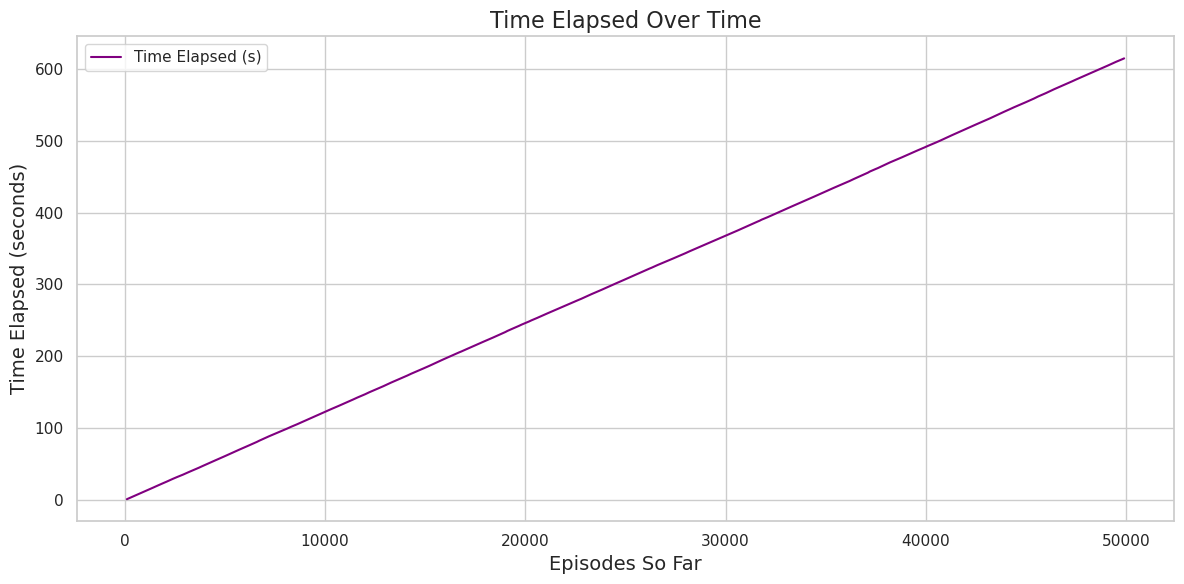

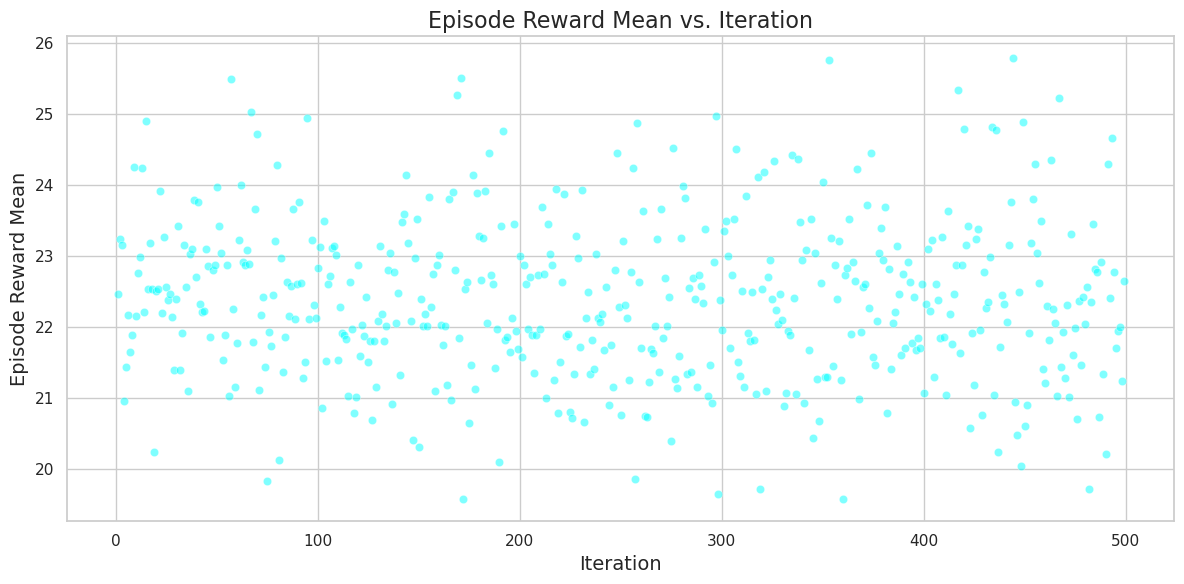

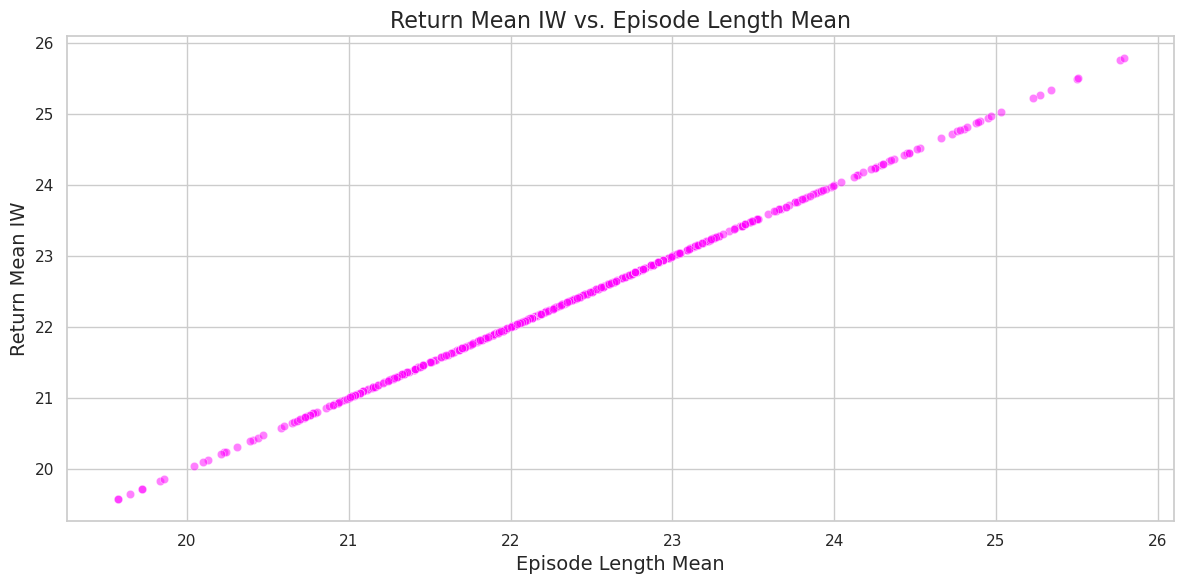

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Load the Data
# -----------------------------
# Replace 'data.csv' with the path to your CSV file if it's in a different directory
data = pd.read_csv('logs/RLLAB.CARTPOLE_delta=0.4_seed=0_1726853861.1413713.csv')

# Display the first few rows to verify
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

# -----------------------------
# 2. Data Cleaning and Preparation
# -----------------------------
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Since 'InitialBound', 'LearnableVariance', 'Bound', and 'VarianceInit' have constant or missing values,
# we'll focus on the more dynamic metrics.

# Convert 'EpisodesSoFar' to integer if it's not already
data['EpisodesSoFar'] = data['EpisodesSoFar'].astype(int)

# -----------------------------
# 3. Setting Up Plotting Style
# -----------------------------
sns.set(style="whitegrid")  # Set Seaborn style for better aesthetics

# -----------------------------
# 4. Plotting Important Metrics
# -----------------------------

# a. Episode Reward Mean vs. Episodes
plt.figure(figsize=(12, 6))
sns.lineplot(x='EpisodesSoFar', y='EpRewMean', data=data, label='Episode Reward Mean', color='blue')
plt.xlabel('Episodes So Far', fontsize=14)
plt.ylabel('Average Reward', fontsize=14)
plt.title('Episode Reward Mean Over Time', fontsize=16)
plt.legend()
plt.tight_layout()
# plt.savefig('episode_reward_mean.png')  # Saves the plot as a PNG file
plt.show()

# b. Episode Length Mean vs. Episodes
plt.figure(figsize=(12, 6))
sns.lineplot(x='EpisodesSoFar', y='EpLenMean', data=data, label='Episode Length Mean', color='orange')
plt.xlabel('Episodes So Far', fontsize=14)
plt.ylabel('Average Episode Length', fontsize=14)
plt.title('Episode Length Mean Over Time', fontsize=16)
plt.legend()
plt.tight_layout()
# plt.savefig('episode_length_mean.png')
plt.show()

# c. Return Mean IW vs. Episodes
plt.figure(figsize=(12, 6))
sns.lineplot(x='EpisodesSoFar', y='ReturnMeanIW', data=data, label='Return Mean IW', color='green')
plt.xlabel('Episodes So Far', fontsize=14)
plt.ylabel('Return Mean IW', fontsize=14)
plt.title('Return Mean IW Over Time', fontsize=16)
plt.legend()
plt.tight_layout()
# plt.savefig('return_mean_iw.png')
plt.show()

# d. Mean Entropy vs. Episodes
plt.figure(figsize=(12, 6))
sns.lineplot(x='EpisodesSoFar', y='MeanEntropy', data=data, label='Mean Entropy', color='red')
plt.xlabel('Episodes So Far', fontsize=14)
plt.ylabel('Mean Entropy', fontsize=14)
plt.title('Mean Entropy Over Time', fontsize=16)
plt.legend()
plt.tight_layout()
# plt.savefig('mean_entropy.png')
plt.show()

# e. Time Elapsed vs. Episodes
plt.figure(figsize=(12, 6))
sns.lineplot(x='EpisodesSoFar', y='TimeElapsed', data=data, label='Time Elapsed (s)', color='purple')
plt.xlabel('Episodes So Far', fontsize=14)
plt.ylabel('Time Elapsed (seconds)', fontsize=14)
plt.title('Time Elapsed Over Time', fontsize=16)
plt.legend()
plt.tight_layout()
# plt.savefig('time_elapsed.png')
plt.show()

# -----------------------------
# 5. Additional Insights
# -----------------------------

# a. Episode Reward Mean vs. Iteration
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Iteration', y='EpRewMean', data=data, alpha=0.5, color='cyan')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Episode Reward Mean', fontsize=14)
plt.title('Episode Reward Mean vs. Iteration', fontsize=16)
plt.grid(True)
plt.tight_layout()
# plt.savefig('reward_vs_iteration.png')
plt.show()

# b. Return Mean IW vs. Episode Length Mean
plt.figure(figsize=(12, 6))
sns.scatterplot(x='EpLenMean', y='ReturnMeanIW', data=data, alpha=0.5, color='magenta')
plt.xlabel('Episode Length Mean', fontsize=14)
plt.ylabel('Return Mean IW', fontsize=14)
plt.title('Return Mean IW vs. Episode Length Mean', fontsize=16)
plt.grid(True)
plt.tight_layout()
# plt.savefig('return_vs_episode_length.png')
plt.show()


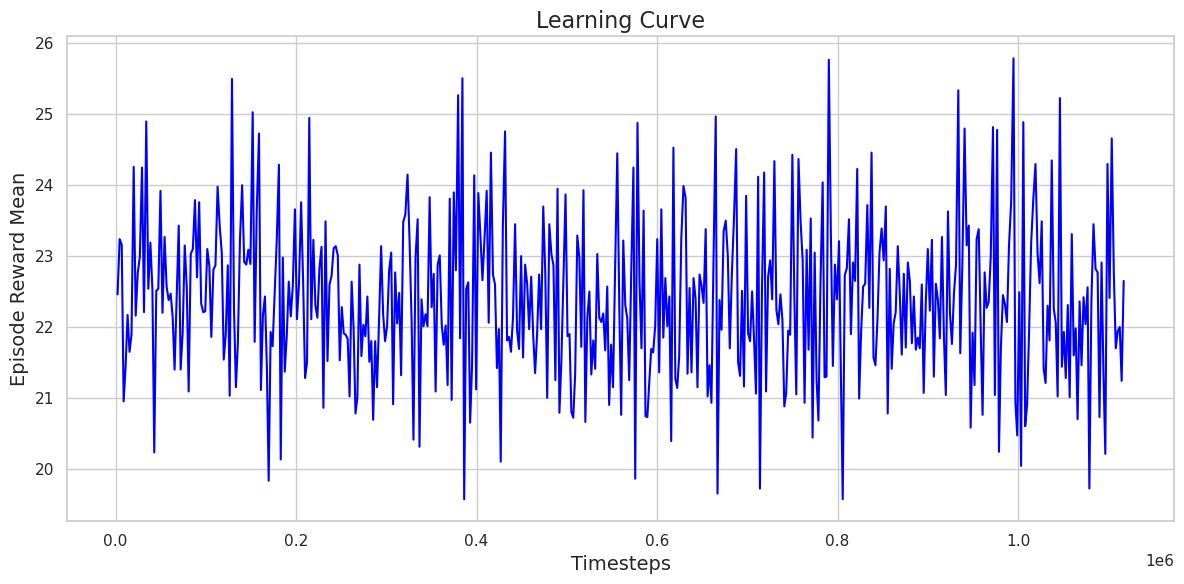

In [2]:
# Learning Curve (EpRewMean vs TimestepsSoFar)
plt.figure(figsize=(12, 6))
sns.lineplot(x='TimestepsSoFar', y='EpRewMean', data=data, color='blue')
plt.xlabel('Timesteps', fontsize=14)
plt.ylabel('Episode Reward Mean', fontsize=14)
plt.title('Learning Curve', fontsize=16)
plt.tight_layout()
plt.show()

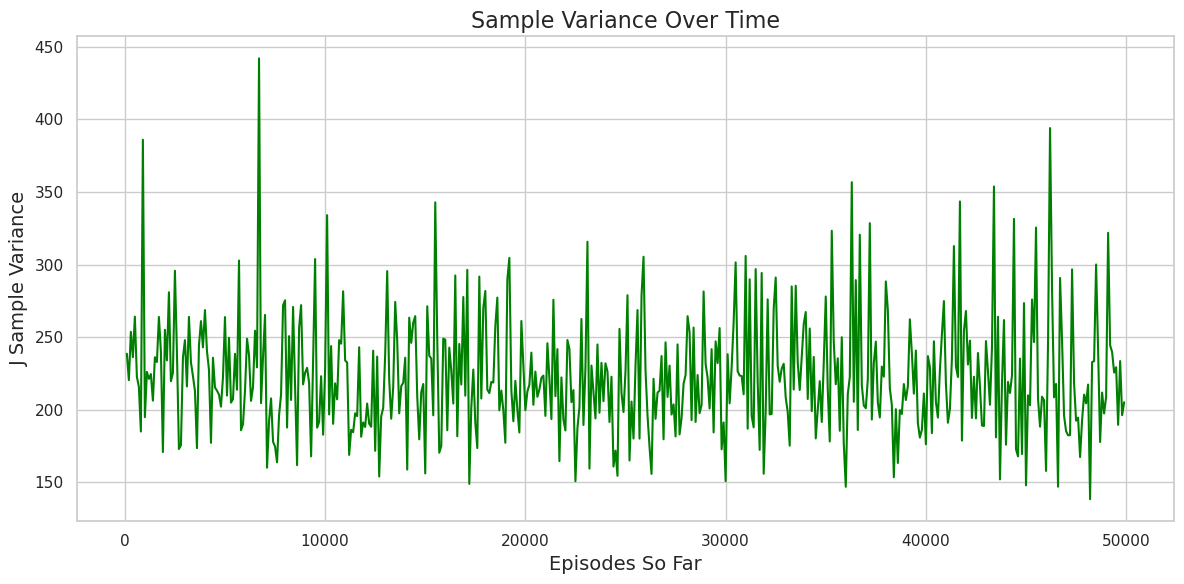

In [3]:
# J_sample_variance over Episodes
plt.figure(figsize=(12, 6))
sns.lineplot(x='EpisodesSoFar', y='J_sample_variance', data=data, color='green')
plt.xlabel('Episodes So Far', fontsize=14)
plt.ylabel('J Sample Variance', fontsize=14)
plt.title('Sample Variance Over Time', fontsize=16)
plt.tight_layout()
plt.show()

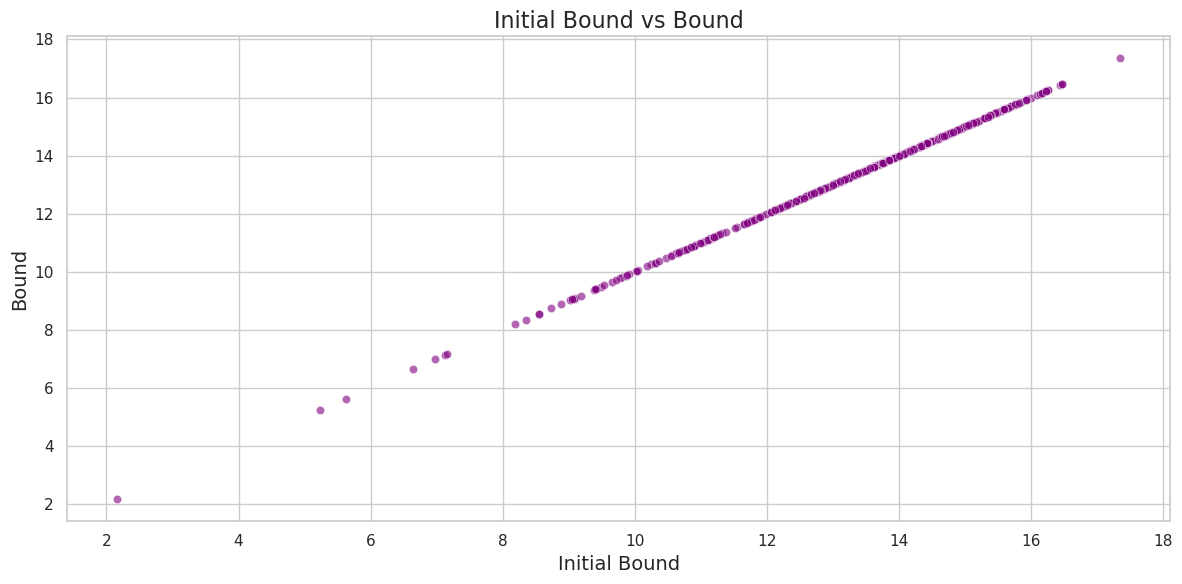

In [4]:
# Initial Bound vs Bound
plt.figure(figsize=(12, 6))
sns.scatterplot(x='InitialBound', y='Bound', data=data, alpha=0.6, color='purple')
plt.xlabel('Initial Bound', fontsize=14)
plt.ylabel('Bound', fontsize=14)
plt.title('Initial Bound vs Bound', fontsize=16)
plt.tight_layout()
plt.show()

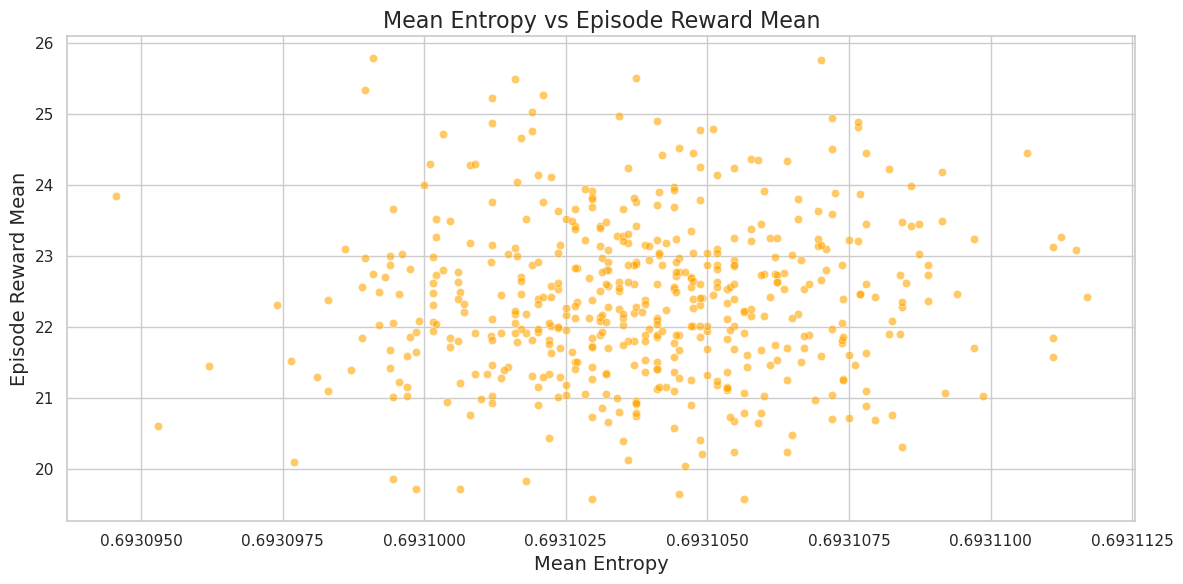

In [5]:
# Mean Entropy vs Episode Reward Mean
plt.figure(figsize=(12, 6))
sns.scatterplot(x='MeanEntropy', y='EpRewMean', data=data, alpha=0.6, color='orange')
plt.xlabel('Mean Entropy', fontsize=14)
plt.ylabel('Episode Reward Mean', fontsize=14)
plt.title('Mean Entropy vs Episode Reward Mean', fontsize=16)
plt.tight_layout()
plt.show()

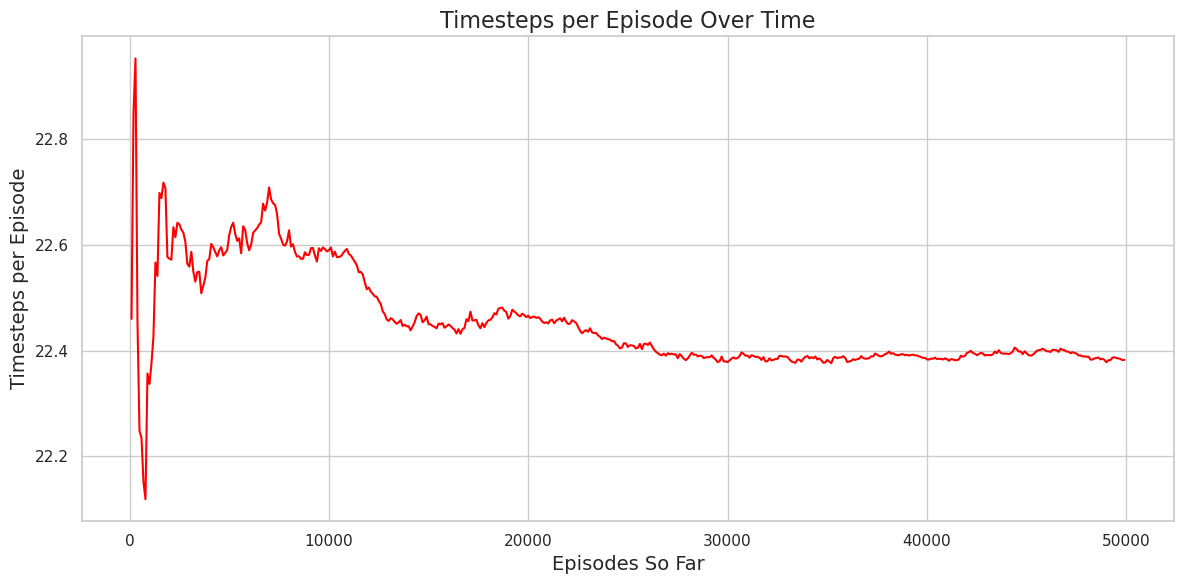

In [6]:
# Calculate timesteps per episode
data['TimestepsPerEpisode'] = data['TimestepsSoFar'] / data['EpisodesSoFar']

# Timesteps per Episode over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='EpisodesSoFar', y='TimestepsPerEpisode', data=data, color='red')
plt.xlabel('Episodes So Far', fontsize=14)
plt.ylabel('Timesteps per Episode', fontsize=14)
plt.title('Timesteps per Episode Over Time', fontsize=16)
plt.tight_layout()
plt.show()